* 期中作業
    * 找出最佳解

## 匯入資料

In [34]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [35]:
print("資料樣態:",train_images.shape)
print("資料樣態:",test_images.shape)

資料樣態: (60000, 28, 28)
資料樣態: (10000, 28, 28)


In [36]:
import numpy as np
type(test_labels)
data_labels = np.concatenate((train_labels, test_labels))
print("資料樣態:",data_labels.shape)

資料樣態: (70000,)


In [37]:
data_images = np.concatenate((train_images, test_images))
print("資料樣態:",data_images.shape)

資料樣態: (70000, 28, 28)


In [38]:
import random
random.seed(10)
train_num=random.sample(range(0, 69999), 60000)
test_num=np.setdiff1d(list(range(0, 70000)), train_num, assume_unique=False)
data_train_images=data_images[train_num,]
data_train_labels=data_labels[train_num,]
data_test_images=data_images[test_num,]
data_test_labels=data_labels[test_num,]
print("訓練集資料樣態(image):",data_train_images.shape)
print("測試集資料樣態(label):",data_test_labels.shape)

訓練集資料樣態(image): (60000, 28, 28)
測試集資料樣態(label): (10000,)


In [39]:
##驗證是否交集小工具
def inter(a,b):
    return list(set(a)&set(b))
 
lst3=inter(train_num,test_num)
if lst3:
    print(lst3)
else:
    print("Empty")

Empty


## 進入資料處理

In [40]:
data_train_images=data_train_images.reshape((60000,28*28))
data_train_images=data_train_images.astype('float32')/255

data_test_images=data_test_images.reshape((10000,28*28))
data_test_images=data_test_images.astype('float32')/255

## 原始模型

In [41]:
from keras import models
from keras import layers

In [42]:
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [43]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [44]:
from keras.utils import to_categorical

data_train_labels = to_categorical(data_train_labels)#標籤類別化
data_test_labels = to_categorical(data_test_labels)

In [45]:
x_val = data_train_images[:10000]
partial_x_train = data_train_images[10000:]
y_val = data_train_labels[:10000]
partial_y_train = data_train_labels[10000:]

In [46]:
history = network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 3s 5ms/step - loss: 0.4061 - accuracy: 0.8866 - val_loss: 0.2291 - val_accuracy: 0.9334
Epoch 2/20
391/391 [==============================] - 2s 4ms/step - loss: 0.1890 - accuracy: 0.9444 - val_loss: 0.1721 - val_accuracy: 0.9509
Epoch 3/20
391/391 [==============================] - 2s 4ms/step - loss: 0.1370 - accuracy: 0.9592 - val_loss: 0.1418 - val_accuracy: 0.9583
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 0.1108 - accuracy: 0.9667 - val_loss: 0.1192 - val_accuracy: 0.9630
Epoch 5/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0919 - accuracy: 0.9719 - val_loss: 0.1101 - val_accuracy: 0.9673
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0792 - accuracy: 0.9765 - val_loss: 0.1111 - val_accuracy: 0.9680
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0686 - accuracy: 0.9791 - val_loss: 0.1208 - val_accuracy: 0.9636
Epoch 

In [47]:
#訓練的過程會把相關資訊存放在 history，透過事後分析訓練過程的資訊可以幫助我們優化參數。
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

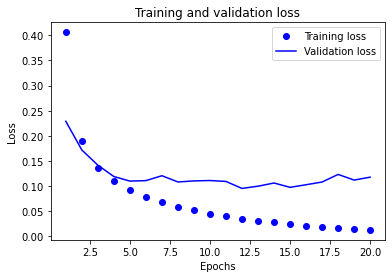

In [48]:
#透過上面的方法可以取得訓練 History 包含的資訊，然後我們將資訊繪製成為圖表，如下：
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [49]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

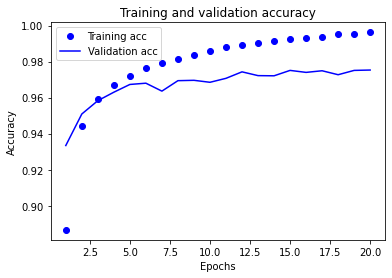

In [50]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [51]:
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

network.fit(data_train_images, data_train_labels, epochs=8, batch_size=512)
results = network.evaluate(data_test_images, data_test_labels)

Epoch 1/8
118/118 [==============================] - 2s 8ms/step - loss: 0.1786 - accuracy: 0.7309
Epoch 2/8
118/118 [==============================] - 1s 8ms/step - loss: 0.0714 - accuracy: 0.9008
Epoch 3/8
118/118 [==============================] - 1s 7ms/step - loss: 0.0549 - accuracy: 0.9192
Epoch 4/8
118/118 [==============================] - 1s 7ms/step - loss: 0.0460 - accuracy: 0.9316
Epoch 5/8
118/118 [==============================] - 1s 7ms/step - loss: 0.0401 - accuracy: 0.9402
Epoch 6/8
118/118 [==============================] - 1s 7ms/step - loss: 0.0358 - accuracy: 0.9465
Epoch 7/8
118/118 [==============================] - 1s 6ms/step - loss: 0.0324 - accuracy: 0.9512
Epoch 8/8
313/313 [==============================] - 1s 2ms/step - loss: 0.0323 - accuracy: 0.9505


## 減少network
* 為什麼只做到16，不繼續減少至8或4的神經元，這是因為layer units少於你要估計的10個機率，會不太OK。

### 減少至32layer units

In [52]:
network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [53]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [54]:
history = network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 3s 5ms/step - loss: 0.5015 - accuracy: 0.8593 - val_loss: 0.2988 - val_accuracy: 0.9160
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 0.2374 - accuracy: 0.9306 - val_loss: 0.2214 - val_accuracy: 0.9368
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1898 - accuracy: 0.9441 - val_loss: 0.1942 - val_accuracy: 0.9439
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1605 - accuracy: 0.9524 - val_loss: 0.1708 - val_accuracy: 0.9502
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1401 - accuracy: 0.9590 - val_loss: 0.1590 - val_accuracy: 0.9530
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1256 - accuracy: 0.9625 - val_loss: 0.1452 - val_accuracy: 0.9569
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1143 - accuracy: 0.9661 - val_loss: 0.1404 - val_accuracy: 0.9577
Epoch 

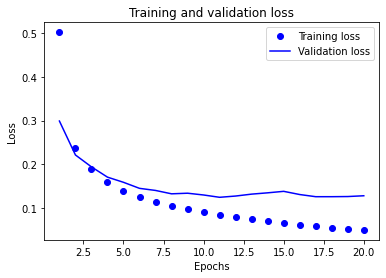

In [55]:
#透過上面的方法可以取得訓練 History 包含的資訊，然後我們將資訊繪製成為圖表，如下：
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

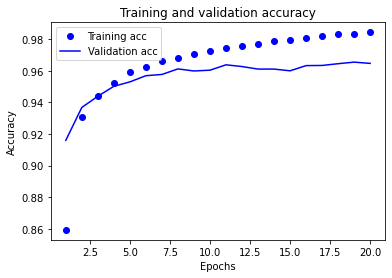

In [56]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [57]:
network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(32, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

network.fit(data_train_images, data_train_labels, epochs=8, batch_size=512)
results = network.evaluate(data_test_images, data_test_labels)

Epoch 1/8
118/118 [==============================] - 2s 8ms/step - loss: 0.2203 - accuracy: 0.6663
Epoch 2/8
118/118 [==============================] - 1s 6ms/step - loss: 0.0867 - accuracy: 0.8876
Epoch 3/8
118/118 [==============================] - 1s 6ms/step - loss: 0.0655 - accuracy: 0.9088
Epoch 4/8
118/118 [==============================] - 1s 5ms/step - loss: 0.0556 - accuracy: 0.9210
Epoch 5/8
118/118 [==============================] - 1s 5ms/step - loss: 0.0492 - accuracy: 0.9297
Epoch 6/8
118/118 [==============================] - 1s 6ms/step - loss: 0.0446 - accuracy: 0.9362
Epoch 7/8
118/118 [==============================] - 1s 5ms/step - loss: 0.0408 - accuracy: 0.9416
Epoch 8/8
313/313 [==============================] - 1s 2ms/step - loss: 0.0381 - accuracy: 0.9446


### 減少至16layer units

In [58]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [59]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [60]:
history = network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 3s 5ms/step - loss: 0.6616 - accuracy: 0.8222 - val_loss: 0.3397 - val_accuracy: 0.9025
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 0.2999 - accuracy: 0.9140 - val_loss: 0.2900 - val_accuracy: 0.9159
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 0.2598 - accuracy: 0.9238 - val_loss: 0.2782 - val_accuracy: 0.9209
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 0.2354 - accuracy: 0.9303 - val_loss: 0.2511 - val_accuracy: 0.9274
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 0.2167 - accuracy: 0.9353 - val_loss: 0.2332 - val_accuracy: 0.9337
Epoch 6/20
391/391 [==============================] - 1s 4ms/step - loss: 0.2021 - accuracy: 0.9400 - val_loss: 0.2230 - val_accuracy: 0.9368
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1897 - accuracy: 0.9441 - val_loss: 0.2124 - val_accuracy: 0.9402
Epoch 

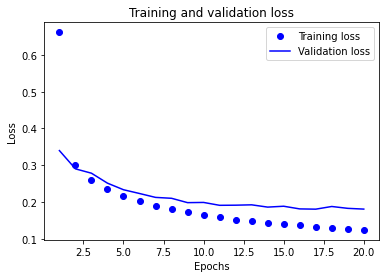

In [61]:
#透過上面的方法可以取得訓練 History 包含的資訊，然後我們將資訊繪製成為圖表，如下：
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

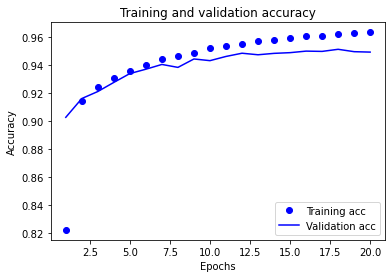

In [62]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [63]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(16, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

network.fit(data_train_images, data_train_labels, epochs=7, batch_size=512)
results = network.evaluate(data_test_images, data_test_labels)

Epoch 1/7
118/118 [==============================] - 2s 7ms/step - loss: 0.2833 - accuracy: 0.5074
Epoch 2/7
118/118 [==============================] - 1s 6ms/step - loss: 0.1561 - accuracy: 0.7419
Epoch 3/7
118/118 [==============================] - 1s 5ms/step - loss: 0.1194 - accuracy: 0.8066
Epoch 4/7
118/118 [==============================] - 1s 5ms/step - loss: 0.1014 - accuracy: 0.8436
Epoch 5/7
118/118 [==============================] - 1s 5ms/step - loss: 0.0891 - accuracy: 0.8680
Epoch 6/7
118/118 [==============================] - 1s 5ms/step - loss: 0.0803 - accuracy: 0.8818
Epoch 7/7
313/313 [==============================] - 1s 2ms/step - loss: 0.0718 - accuracy: 0.8944


## 加入懲法項(L1 or L2)

### L1 alpha=0.001

In [66]:
from keras import regularizers
network = models.Sequential()
network.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 3s 5ms/step - loss: 1.3763 - accuracy: 0.8666 - val_loss: 0.9154 - val_accuracy: 0.8975
Epoch 2/20
391/391 [==============================] - 1s 4ms/step - loss: 0.8111 - accuracy: 0.9071 - val_loss: 0.7378 - val_accuracy: 0.9123
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 0.6751 - accuracy: 0.9192 - val_loss: 0.6469 - val_accuracy: 0.9165
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 0.5913 - accuracy: 0.9276 - val_loss: 0.5538 - val_accuracy: 0.9329
Epoch 5/20
391/391 [==============================] - 2s 4ms/step - loss: 0.5413 - accuracy: 0.9323 - val_loss: 0.5151 - val_accuracy: 0.9366
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 0.5051 - accuracy: 0.9365 - val_loss: 0.4901 - val_accuracy: 0.9397
Epoch 7/20
391/391 [==============================] - 1s 4ms/step - loss: 0.4772 - accuracy: 0.9394 - val_loss: 0.5002 - val_accuracy: 0.9327
Epoch 

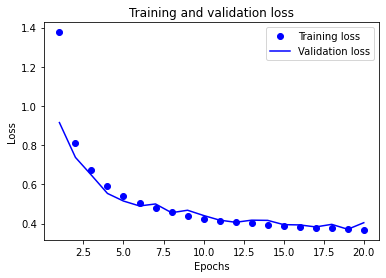

In [67]:
#透過上面的方法可以取得訓練 History 包含的資訊，然後我們將資訊繪製成為圖表，如下：
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

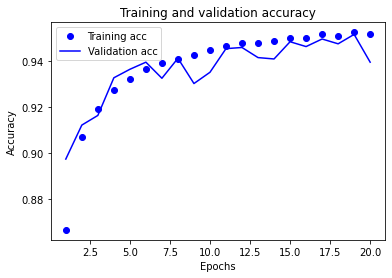

In [68]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [69]:
network = models.Sequential()
network.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(data_train_images, data_train_labels, epochs=6, batch_size=512)
results = network.evaluate(data_test_images, data_test_labels)

Epoch 1/6
118/118 [==============================] - 2s 8ms/step - loss: 1.9538 - accuracy: 0.8322
Epoch 2/6
118/118 [==============================] - 1s 7ms/step - loss: 1.0618 - accuracy: 0.8994
Epoch 3/6
118/118 [==============================] - 1s 7ms/step - loss: 0.9086 - accuracy: 0.9057
Epoch 4/6
118/118 [==============================] - 1s 6ms/step - loss: 0.8143 - accuracy: 0.9110
Epoch 5/6
118/118 [==============================] - 1s 7ms/step - loss: 0.7463 - accuracy: 0.9143
Epoch 6/6
313/313 [==============================] - 1s 2ms/step - loss: 0.7715 - accuracy: 0.8810


### L2 alpha=0.001

In [70]:
from keras import regularizers
network = models.Sequential()
network.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 3s 5ms/step - loss: 0.5549 - accuracy: 0.8867 - val_loss: 0.3594 - val_accuracy: 0.9347
Epoch 2/20
391/391 [==============================] - 2s 4ms/step - loss: 0.3230 - accuracy: 0.9416 - val_loss: 0.3315 - val_accuracy: 0.9360
Epoch 3/20
391/391 [==============================] - 1s 4ms/step - loss: 0.2722 - accuracy: 0.9528 - val_loss: 0.2769 - val_accuracy: 0.9510
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 0.2400 - accuracy: 0.9595 - val_loss: 0.2430 - val_accuracy: 0.9588
Epoch 5/20
391/391 [==============================] - 1s 4ms/step - loss: 0.2185 - accuracy: 0.9647 - val_loss: 0.2304 - val_accuracy: 0.9609
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 0.2025 - accuracy: 0.9676 - val_loss: 0.2430 - val_accuracy: 0.9538
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 0.1905 - accuracy: 0.9703 - val_loss: 0.2043 - val_accuracy: 0.9646
Epoch 

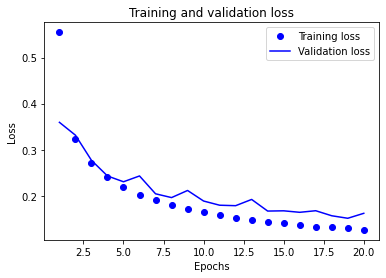

In [71]:
#透過上面的方法可以取得訓練 History 包含的資訊，然後我們將資訊繪製成為圖表，如下：
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

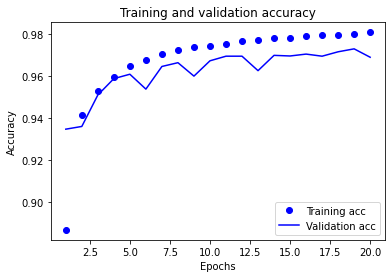

In [72]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [73]:
network = models.Sequential()
network.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(data_train_images, data_train_labels, epochs=10, batch_size=512)
results = network.evaluate(data_test_images, data_test_labels)

Epoch 1/10
118/118 [==============================] - 2s 8ms/step - loss: 0.7314 - accuracy: 0.8530
Epoch 2/10
118/118 [==============================] - 1s 8ms/step - loss: 0.4033 - accuracy: 0.9247
Epoch 3/10
118/118 [==============================] - 1s 7ms/step - loss: 0.3401 - accuracy: 0.9398
Epoch 4/10
118/118 [==============================] - 1s 7ms/step - loss: 0.3024 - accuracy: 0.9470
Epoch 5/10
118/118 [==============================] - 1s 7ms/step - loss: 0.2770 - accuracy: 0.9528
Epoch 6/10
118/118 [==============================] - 1s 8ms/step - loss: 0.2569 - accuracy: 0.9578
Epoch 7/10
118/118 [==============================] - 1s 7ms/step - loss: 0.2412 - accuracy: 0.9606
Epoch 8/10
118/118 [==============================] - 1s 7ms/step - loss: 0.2287 - accuracy: 0.9631
Epoch 9/10
118/118 [==============================] - 1s 8ms/step - loss: 0.2165 - accuracy: 0.9651
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2442 - accuracy: 0.9563

### L1和L2 alpha=0.001

In [75]:
from keras import regularizers
network = models.Sequential()
network.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(0.001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(0.001), activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 3s 5ms/step - loss: 1.7191 - accuracy: 0.8558 - val_loss: 1.0140 - val_accuracy: 0.8860
Epoch 2/20
391/391 [==============================] - 2s 4ms/step - loss: 0.9000 - accuracy: 0.8896 - val_loss: 0.8443 - val_accuracy: 0.8929
Epoch 3/20
391/391 [==============================] - 2s 4ms/step - loss: 0.7765 - accuracy: 0.8965 - val_loss: 0.7433 - val_accuracy: 0.9018
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 0.7084 - accuracy: 0.9023 - val_loss: 0.6823 - val_accuracy: 0.9065
Epoch 5/20
391/391 [==============================] - 1s 4ms/step - loss: 0.6586 - accuracy: 0.9065 - val_loss: 0.6533 - val_accuracy: 0.9027
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 0.6240 - accuracy: 0.9116 - val_loss: 0.6172 - val_accuracy: 0.9092
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 0.5989 - accuracy: 0.9157 - val_loss: 0.6015 - val_accuracy: 0.9128
Epoch 

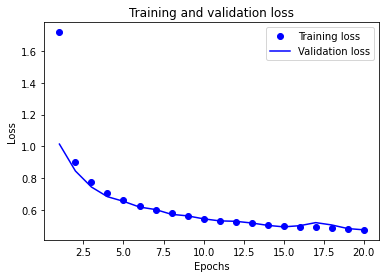

In [76]:
#透過上面的方法可以取得訓練 History 包含的資訊，然後我們將資訊繪製成為圖表，如下：
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

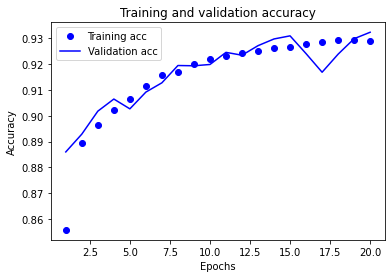

In [77]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [78]:
network = models.Sequential()
network.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(data_train_images, data_train_labels, epochs=11, batch_size=512)
results = network.evaluate(data_test_images, data_test_labels)

Epoch 1/11
118/118 [==============================] - 2s 8ms/step - loss: 0.7556 - accuracy: 0.8446
Epoch 2/11
118/118 [==============================] - 1s 7ms/step - loss: 0.4177 - accuracy: 0.9211
Epoch 3/11
118/118 [==============================] - 1s 6ms/step - loss: 0.3534 - accuracy: 0.9352
Epoch 4/11
118/118 [==============================] - 1s 6ms/step - loss: 0.3126 - accuracy: 0.9449
Epoch 5/11
118/118 [==============================] - 1s 7ms/step - loss: 0.2846 - accuracy: 0.9503
Epoch 6/11
118/118 [==============================] - 1s 7ms/step - loss: 0.2631 - accuracy: 0.9560
Epoch 7/11
118/118 [==============================] - 1s 6ms/step - loss: 0.2458 - accuracy: 0.9601
Epoch 8/11
118/118 [==============================] - 1s 7ms/step - loss: 0.2336 - accuracy: 0.9625
Epoch 9/11
118/118 [==============================] - 1s 7ms/step - loss: 0.2212 - accuracy: 0.9650
Epoch 10/11
118/118 [==============================] - 1s 7ms/step - loss: 0.2107 - accuracy: 0.9676

## 加入類似噪音的方式(dropout)

In [83]:
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 0.9057 - accuracy: 0.7071 - val_loss: 0.3043 - val_accuracy: 0.9134
Epoch 2/20
391/391 [==============================] - 2s 4ms/step - loss: 0.4935 - accuracy: 0.8550 - val_loss: 0.2504 - val_accuracy: 0.9288
Epoch 3/20
391/391 [==============================] - 2s 4ms/step - loss: 0.4288 - accuracy: 0.8800 - val_loss: 0.2219 - val_accuracy: 0.9365
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 0.3842 - accuracy: 0.8923 - val_loss: 0.2116 - val_accuracy: 0.9405
Epoch 5/20
391/391 [==============================] - 2s 4ms/step - loss: 0.3641 - accuracy: 0.8996 - val_loss: 0.1936 - val_accuracy: 0.9463
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 0.3441 - accuracy: 0.9041 - val_loss: 0.1875 - val_accuracy: 0.9486
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 0.3337 - accuracy: 0.9069 - val_loss: 0.1783 - val_accuracy: 0.9506
Epoch 

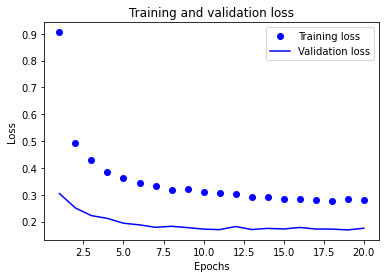

In [84]:
#透過上面的方法可以取得訓練 History 包含的資訊，然後我們將資訊繪製成為圖表，如下：
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

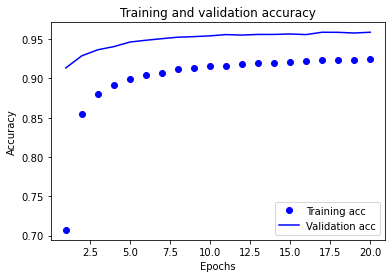

In [85]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [89]:
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(data_train_images, data_train_labels, epochs=6, batch_size=512)
results = network.evaluate(data_test_images, data_test_labels)

Epoch 1/6
118/118 [==============================] - 2s 9ms/step - loss: 1.2535 - accuracy: 0.5747
Epoch 2/6
118/118 [==============================] - 1s 8ms/step - loss: 0.6596 - accuracy: 0.7947
Epoch 3/6
118/118 [==============================] - 1s 9ms/step - loss: 0.5261 - accuracy: 0.8422
Epoch 4/6
118/118 [==============================] - 1s 8ms/step - loss: 0.4590 - accuracy: 0.8659
Epoch 5/6
118/118 [==============================] - 1s 8ms/step - loss: 0.4226 - accuracy: 0.8767
Epoch 6/6
313/313 [==============================] - 1s 2ms/step - loss: 0.2043 - accuracy: 0.9435


## 結論

* 都是一個隱藏層hidden layers  

> 原始模型 64units 8 epochs - loss: 0.0323 - accuracy: 0.9505
----

| 改變的方式 | epochs | 損失 | 準確率 |  
| ------- |:-------:|:-------:|:-------:|  
| 減少至32的units | 8 | 0.0381 | 0.9446 |  
| 減少至16的units | 7 | 0.0718 | 0.8944 |  
| 加入L1 |6 | 0.7715|0.8810 | 
| 加入L2 | 10 | 0.2442|0.9563 |  
| 加入L1和L2 | 11 | 0.2390 | 0.9562 |  
| dropout | 6 | 0.2043 | 0.9435|  
 
